<a href="https://colab.research.google.com/github/Habeeb239/IMageclasssifiction/blob/main/simpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [139]:
#create a model class that inherits nn.Module
class Model(nn.Module):
    #Input feture (4 featuress of flower)-->
    #Hidden Layer1 (no.of neurons)-->
    #H2(n)-->
    #Output(3 classes of Iris flowers)
    def __init__(self,in_features=4,h1=8, h2=9, out_features=3):
        super().__init__() #instantiate our model
        #fc = fully connected
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    #create a function to move everything forward
    #relu fun() - rectified linear unit
    #do something and the output is less than 0 its 0
    #otherwise use the number as output
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.out(x))

        return x

In [140]:
#lets pick a manual seed for randomisation
torch.manual_seed(41)
#create an instance of seed
model = Model()

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [143]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [144]:
my_df['species'] = my_df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})

<ipython-input-144-0dccf62f8e53>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace({'setosa':0,'versicolor':1,'virginica':2})


In [145]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [146]:
#Train test split
X = my_df.drop('species',axis=1)
y = my_df['species']
#Convert into numpy arrays
X = X.values
y = y.values

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [149]:
#convert x-features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [150]:
#convert y lables to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [151]:
#set the criterian of model to measure the error hoe far the predictions are from
criterion = nn.CrossEntropyLoss()
#choose adam optimiser, lr = learning rate (if the error doesn't go down after a bunch of iterations(epochs), lower our lr )
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)


In [152]:
#Train our model
#Epoch (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and get a pprediction
  y_pred = model.forward(X_train) #get predicted results

  #MEasure the loss , gonna be high at first
  loss = criterion(y_pred,y_train)#predicted value vs the y_train

  #Keep the Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i%10 == 0:
    print(f'Epoch : {i} and loss: {loss}')

  #DO some back propagation: take the rate of forwars propagation and feed it
  #back through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch : 0 and loss: 1.1251550912857056
Epoch : 10 and loss: 1.0096259117126465
Epoch : 20 and loss: 0.8512223958969116
Epoch : 30 and loss: 0.654869019985199
Epoch : 40 and loss: 0.4490566551685333
Epoch : 50 and loss: 0.2707386612892151
Epoch : 60 and loss: 0.15461841225624084
Epoch : 70 and loss: 0.09299226105213165
Epoch : 80 and loss: 0.06447025388479233
Epoch : 90 and loss: 0.050585027784109116


Text(0.5, 0, 'Epoch')

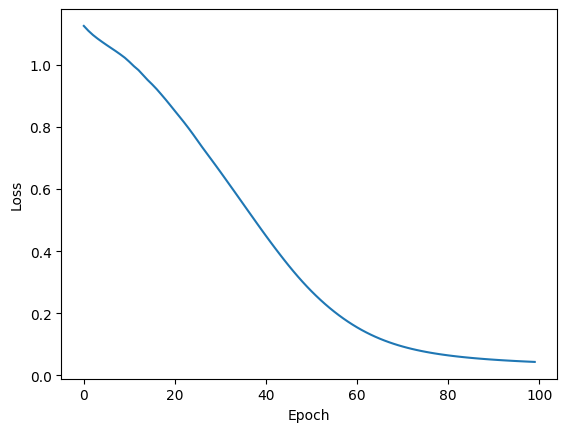

In [153]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [154]:
#Evalate Model on Test data set
with torch.no_grad():# Turn off back propagation
  y_eval = model.forward(X_test) #X_test are features from our test set,y_eval will be predictions

  loss = criterion(y_eval,y_test)#Find loss/error


In [155]:
loss

tensor(0.1296)

In [156]:
correct  = 0
with torch.no_grad():
  for i, data in enumerate (X_test):
    y_val = model.forward(data)
    if y_test[i] == 0:
      x = 'Sentosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'
  #will teell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)}\t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1


print(correct)

1.) tensor([0.0000, 7.4818, 9.9517])	 2 	 2
2.) tensor([ 0.0000,  7.7416, 14.4150])	 2 	 2
3.) tensor([ 0.0000,  9.1741, 15.2260])	 2 	 2
4.) tensor([0.2420, 8.3711, 4.5725])	 1 	 1
5.) tensor([ 0.0000,  8.4455, 12.5213])	 2 	 2
6.) tensor([1.6580, 8.0895, 2.0248])	 1 	 1
7.) tensor([0.0000, 8.1067, 9.3146])	 2 	 2
8.) tensor([0.3616, 8.4538, 4.3424])	 1 	 1
9.) tensor([ 0.0000,  8.2779, 10.8831])	 2 	 2
10.) tensor([ 0.0000,  8.2340, 15.2944])	 2 	 2
11.) tensor([0.0000, 8.0207, 8.7722])	 2 	 2
12.) tensor([9.0044, 3.5022, 0.0000])	 0 	 0
13.) tensor([8.0835, 3.2078, 0.0000])	 0 	 0
14.) tensor([2.2655, 6.5108, 0.4715])	 1 	 1
15.) tensor([8.0545, 3.9531, 0.0000])	 0 	 0
16.) tensor([0.0000, 8.1667, 8.0483])	 2 	 1
17.) tensor([8.3930, 3.3382, 0.0000])	 0 	 0
18.) tensor([0.0000, 7.6729, 9.5912])	 1 	 2
19.) tensor([8.6390, 3.3854, 0.0000])	 0 	 0
20.) tensor([7.5293, 3.3366, 0.0000])	 0 	 0
21.) tensor([2.0055, 7.1311, 1.1164])	 1 	 1
22.) tensor([ 0.0000,  8.4883, 14.0726])	 2 	 2
2

In [162]:
#creating a new data point and test it
new_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [163]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 0.0000,  7.6352, 10.1846])


In [164]:
#save our NN model
torch.save(model.state_dict(),'my_first_iris_model.pt')

In [165]:
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_first_iris_model.pt'))

<ipython-input-165-bd09477831e9>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_first_iris_model.pt'))


<All keys matched successfully>

In [166]:
#make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)